
Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smo

/tmp/ipykernel_42067/3330407874.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


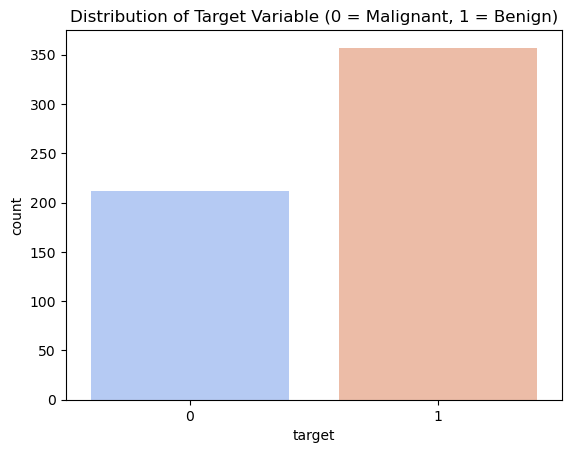

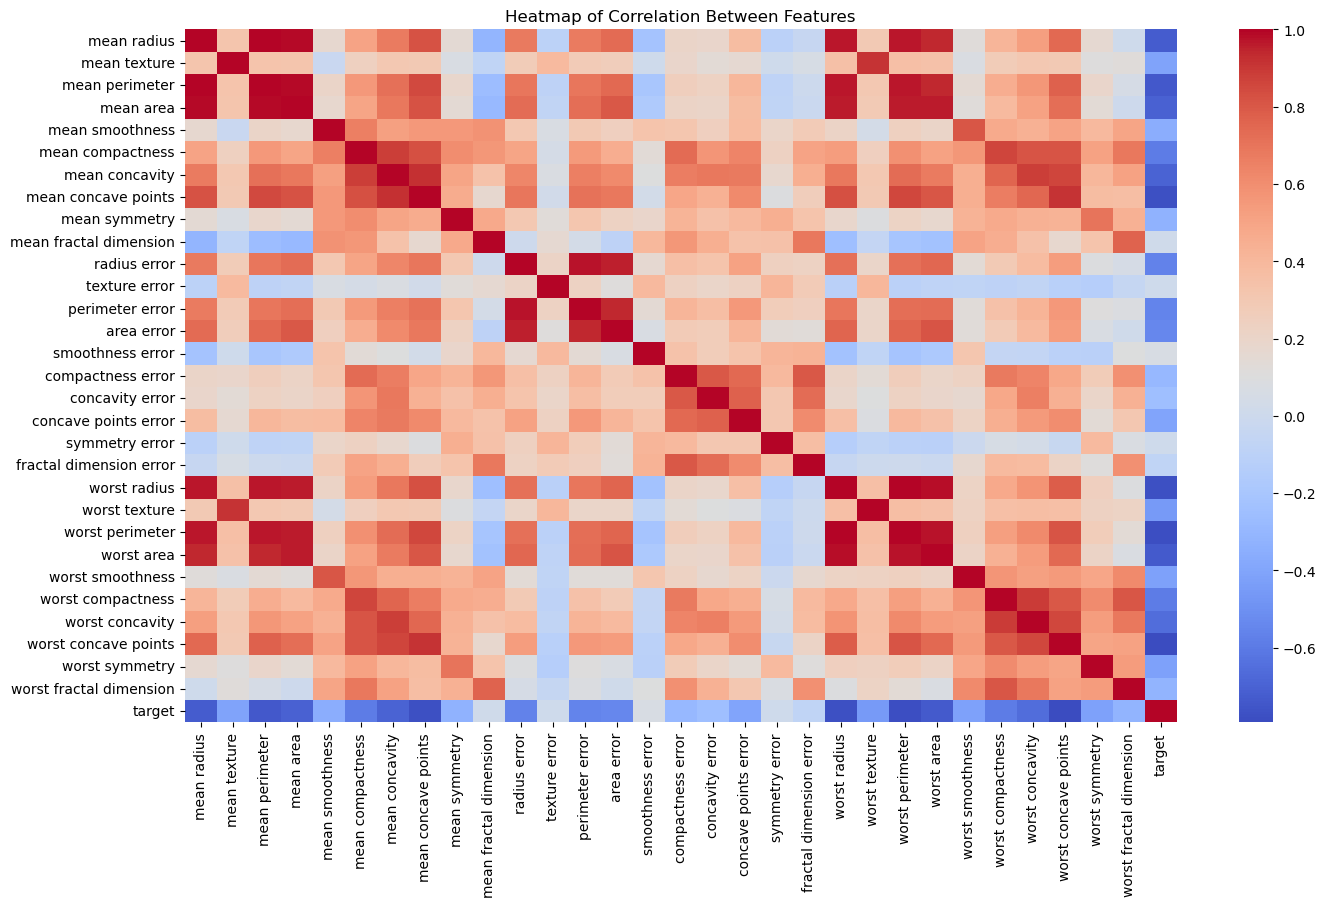

Accuracy of the model: 97.37%


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:



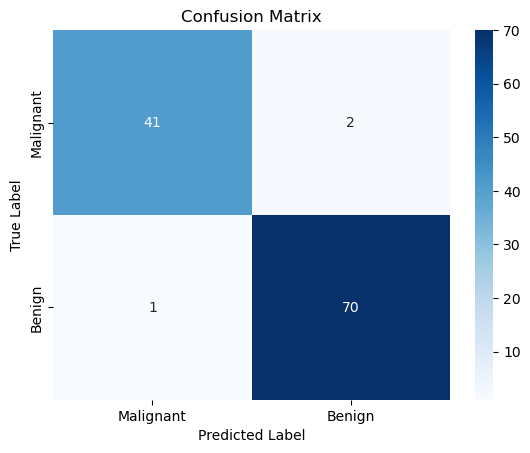

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

# Step 1: Load the Breast Cancer dataset
def load_data():
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target  # Adding the target variable (0 = malignant, 1 = benign)
    return df, data

# Step 2: Exploratory Data Analysis (EDA)
def eda(df):
    print("\nDataset Information:\n")
    print(df.info())  # Info about the dataset
    print("\nFirst 5 rows of the dataset:\n")
    print(df.head())  # Displaying the first few rows
    print("\nStatistical Summary:\n")
    print(df.describe())  # Summary statistics

    # Visualizing the target variable distribution
    sns.countplot(x='target', data=df, palette='coolwarm')
    plt.title('Distribution of Target Variable (0 = Malignant, 1 = Benign)')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(16, 9))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
    plt.title('Heatmap of Correlation Between Features')
    plt.show()

# Step 3: Data Preprocessing
def preprocess_data(df):
    X = df.drop(['target'], axis=1)  # Features
    y = df['target']  # Target variable
    
    # Splitting the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the data (zero mean, unit variance)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Step 4: Building the Logistic Regression Model
def train_model(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

# Step 5: Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the model: {accuracy * 100:.2f}%\n")

    # Classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Main function to execute the case study steps
def breast_cancer_case_study():
    # Load data
    df, data = load_data()
    
    # Perform Exploratory Data Analysis
    eda(df)

    # Preprocess the data
    X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df)

    # Train the logistic regression model
    model = train_model(X_train_scaled, y_train)

    # Evaluate the model
    evaluate_model(model, X_test_scaled, y_test)

# Run the case study
breast_cancer_case_study()
